# Background and Problem Definition

This dataset that we will be working with is from Kaggle, it includes education indicators across countries, such as literacy rates, government spending on education, pupil-teacher ratios, and enrollment rates. The goal is to understand the relationships between these variables and how they affect educational outcomes.

We aim to explore the relationship between government expenditure on education and literacy rates for adults across countries, as well as other factors such as pupil-teacher ratios and school enrollment rates. The primary objective is to determine which factors most strongly influence literacy rates.


## Data Inspection

Import libraries and inspect data.

In [56]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

# Load the dataset
df = pd.read_csv("world-education-data.csv")

#Inspect data set
print(df.info())
print()

df.dropna(inplace=True)

# # Verify that rows with missing values have been removed
print(df.info())
print()

print(df.head())
print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5892 entries, 0 to 5891
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country                     5892 non-null   object 
 1   country_code                5892 non-null   object 
 2   year                        5892 non-null   int64  
 3   gov_exp_pct_gdp             4499 non-null   float64
 4   lit_rate_adult_pct          1877 non-null   float64
 5   pri_comp_rate_pct           4440 non-null   float64
 6   pupil_teacher_primary       3676 non-null   float64
 7   pupil_teacher_secondary     3017 non-null   float64
 8   school_enrol_primary_pct    5352 non-null   float64
 9   school_enrol_secondary_pct  4745 non-null   float64
 10  school_enrol_tertiary_pct   4392 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 506.5+ KB
None

<class 'pandas.core.frame.DataFrame'>
Index: 871 entries, 82 to 5829
Data columns 

## 1. Relationship Between Government Expenditure on Education and Literacy Rate
Investigate whether there is a correlation between the percentage of GDP that a country spends on education and its literacy rate for adults.

Correlation between government expenditure on education and literacy rate: 0.40


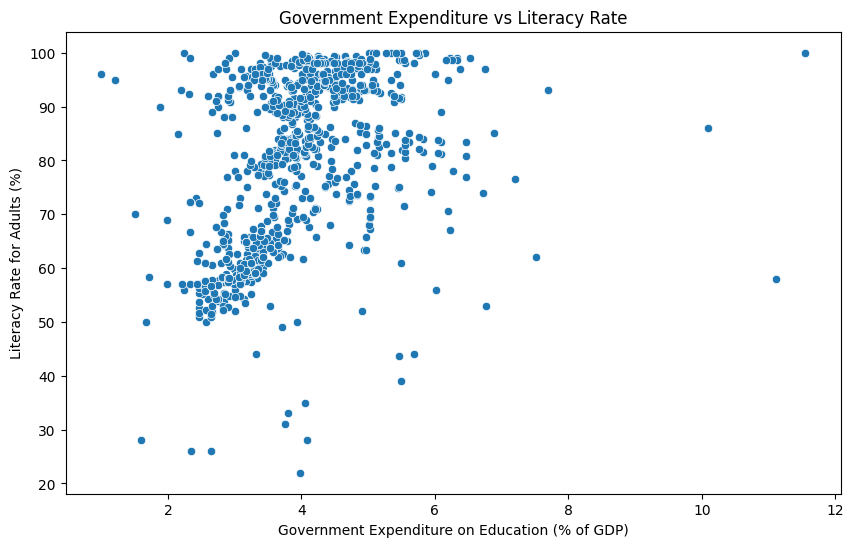

In [57]:


# Calculate the correlation
correlation = df["gov_exp_pct_gdp"].corr(df["lit_rate_adult_pct"])
print(f"Correlation between government expenditure on education and literacy rate: {correlation:.2f}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="gov_exp_pct_gdp", y="lit_rate_adult_pct")
plt.title("Government Expenditure vs Literacy Rate")
plt.xlabel("Government Expenditure on Education (% of GDP)")
plt.ylabel("Literacy Rate for Adults (%)")
plt.show()


## 2. Impact of Pupil-Teacher Ratio on Literacy Rate
Analyze how the pupil-teacher ratio (both primary and secondary levels) affects the literacy rate of adults in a country.


Correlation between primary pupil-teacher ratio and literacy rate: -0.89
Correlation between secondary pupil-teacher ratio and literacy rate: -0.76


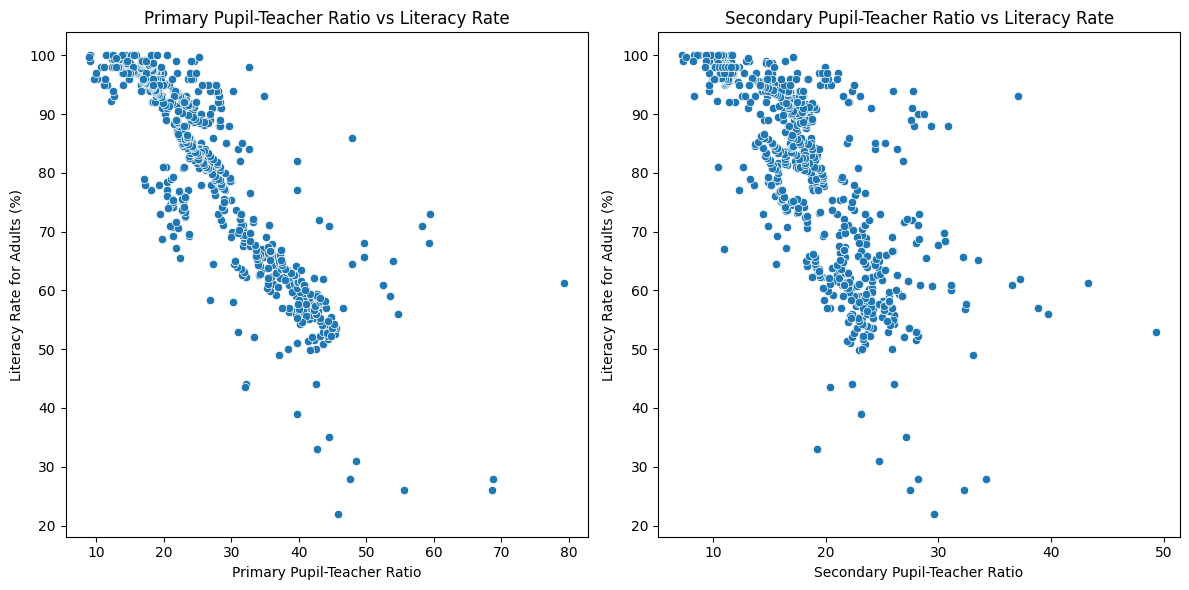

In [58]:

# Calculate correlations
correlation_primary = df["pupil_teacher_primary"].corr(df["lit_rate_adult_pct"])
correlation_secondary = df["pupil_teacher_secondary"].corr(df["lit_rate_adult_pct"])

print(f"Correlation between primary pupil-teacher ratio and literacy rate: {correlation_primary:.2f}")
print(f"Correlation between secondary pupil-teacher ratio and literacy rate: {correlation_secondary:.2f}")

# Scatter plots
plt.figure(figsize=(12, 6))

# Primary pupil-teacher ratio plot
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="pupil_teacher_primary", y="lit_rate_adult_pct")
plt.title("Primary Pupil-Teacher Ratio vs Literacy Rate")
plt.xlabel("Primary Pupil-Teacher Ratio")
plt.ylabel("Literacy Rate for Adults (%)")

# Secondary pupil-teacher ratio plot
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="pupil_teacher_secondary", y="lit_rate_adult_pct")
plt.title("Secondary Pupil-Teacher Ratio vs Literacy Rate")
plt.xlabel("Secondary Pupil-Teacher Ratio")
plt.ylabel("Literacy Rate for Adults (%)")

plt.tight_layout()
plt.show()


## 3. Impact of School Enrollment on Literacy Rate
Investigate the relationship between primary and secondary school enrollment rates and the literacy rate of adults.


Correlation between primary school enrollment and literacy rate: 0.48
Correlation between secondary school enrollment and literacy rate: 0.91


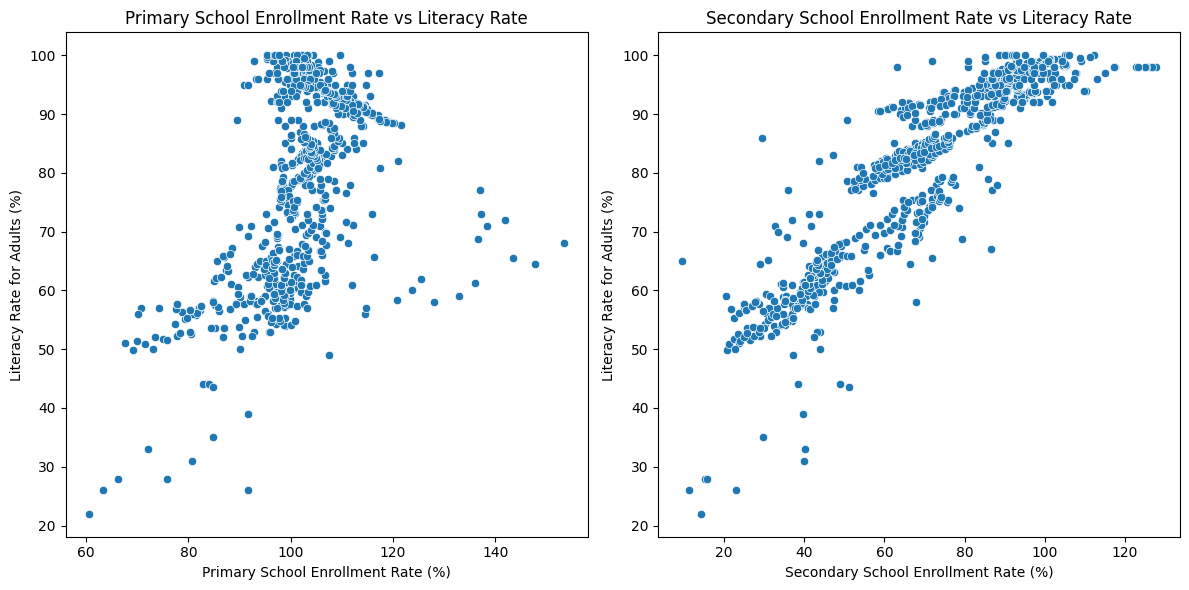

In [59]:

# Calculate correlations
correlation_primary_enrol = df["school_enrol_primary_pct"].corr(df["lit_rate_adult_pct"])
correlation_secondary_enrol = df["school_enrol_secondary_pct"].corr(df["lit_rate_adult_pct"])

print(f"Correlation between primary school enrollment and literacy rate: {correlation_primary_enrol:.2f}")
print(f"Correlation between secondary school enrollment and literacy rate: {correlation_secondary_enrol:.2f}")

# Scatter plots
plt.figure(figsize=(12, 6))

# Primary school enrollment plot
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="school_enrol_primary_pct", y="lit_rate_adult_pct")
plt.title("Primary School Enrollment Rate vs Literacy Rate")
plt.xlabel("Primary School Enrollment Rate (%)")
plt.ylabel("Literacy Rate for Adults (%)")

# Secondary school enrollment plot
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="school_enrol_secondary_pct", y="lit_rate_adult_pct")
plt.title("Secondary School Enrollment Rate vs Literacy Rate")
plt.xlabel("Secondary School Enrollment Rate (%)")
plt.ylabel("Literacy Rate for Adults (%)")

plt.tight_layout()
plt.show()


## 4. Effect of Government Spending on Education on School Enrollment
Explore how government spending on education impacts primary and secondary school enrollment.


Correlation between government spending and primary school enrollment: 0.23
Correlation between government spending and secondary school enrollment: 0.43


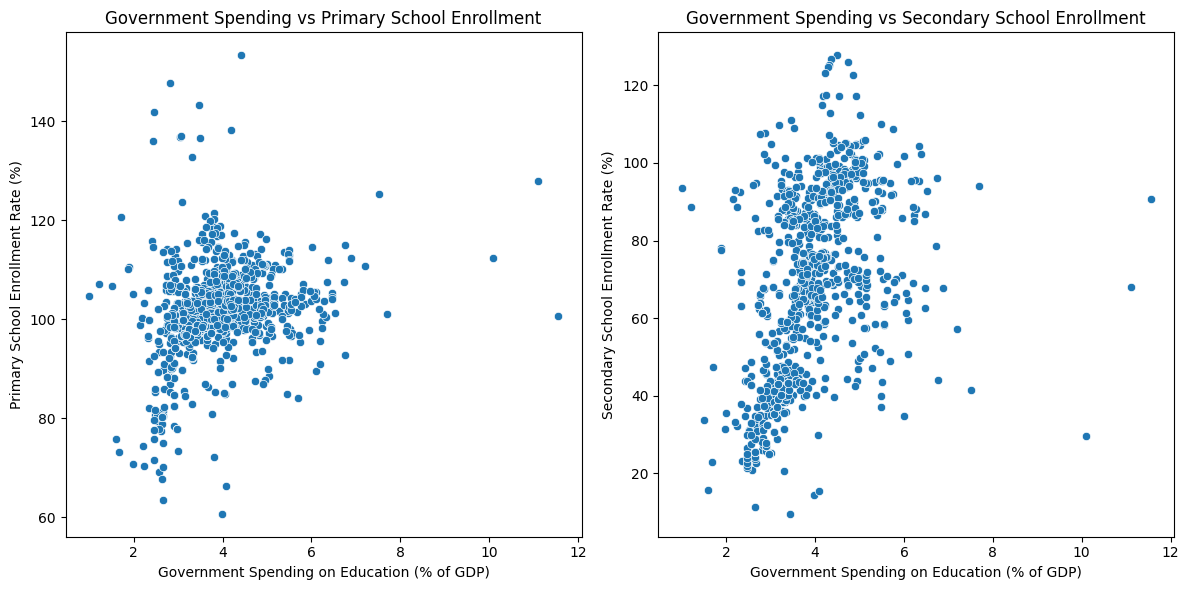

In [60]:
# Calculate correlations
correlation_primary_enroll = df["gov_exp_pct_gdp"].corr(df["school_enrol_primary_pct"])
correlation_secondary_enroll = df["gov_exp_pct_gdp"].corr(df["school_enrol_secondary_pct"])

print(f"Correlation between government spending and primary school enrollment: {correlation_primary_enroll:.2f}")
print(f"Correlation between government spending and secondary school enrollment: {correlation_secondary_enroll:.2f}")

# Scatter plots
plt.figure(figsize=(12, 6))

# Primary school enrollment vs spending
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="gov_exp_pct_gdp", y="school_enrol_primary_pct")
plt.title("Government Spending vs Primary School Enrollment")
plt.xlabel("Government Spending on Education (% of GDP)")
plt.ylabel("Primary School Enrollment Rate (%)")

# Secondary school enrollment vs spending
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="gov_exp_pct_gdp", y="school_enrol_secondary_pct")
plt.title("Government Spending vs Secondary School Enrollment")
plt.xlabel("Government Spending on Education (% of GDP)")
plt.ylabel("Secondary School Enrollment Rate (%)")

plt.tight_layout()
plt.show()


# Conclusion

The analysis reveals that:

- Government expenditure on education has a moderate positive correlation with literacy rates, but its effect is weaker compared to other factors.
- Pupil-teacher ratios show a strong negative correlation with literacy rates, especially at the primary level, indicating that lower ratios improve literacy outcomes.
- School enrollment rates are strongly positively correlated with literacy, particularly at the secondary level.